In [14]:
!pip install category_encoders

     |████████████████████████████████| 69 kB 392 kB/s eta 0:00:011


In [51]:
# Computation Libraries
import numpy as np
import pandas as pd

# Stats Libraries
import statistics as stats

# Visualisazition Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Encoders
import category_encoders as ce

# Modelling Libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Visualisazition Libraries

# Evaluation Metrics Libraries
from sklearn.metrics import accuracy_score

In [29]:
# Importing Data
df = pd.read_csv("./Dataset/Clustering/decision_car_evaluation.csv")
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.head(20)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [31]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [33]:
# Data Encoding
encoder = ce.OrdinalEncoder(cols = df.columns)
df = encoder.fit_transform(df)

In [35]:
df.head(20)

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,2,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1
5,1,1,1,1,3,3,1
6,1,1,1,1,3,1,1
7,1,1,1,1,3,2,1
8,1,1,1,2,1,3,1
9,1,1,1,2,1,1,1


In [44]:
# Data Preparation
X = df.drop("safety", axis = 1)
Y = df["safety"]

train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2, random_state = 33)
print(X.shape, Y.shape,train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(1727, 6) (1727,) (1381, 6) (346, 6) (1381,) (346,)


In [54]:
# Modelling

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 33)
model.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=33)

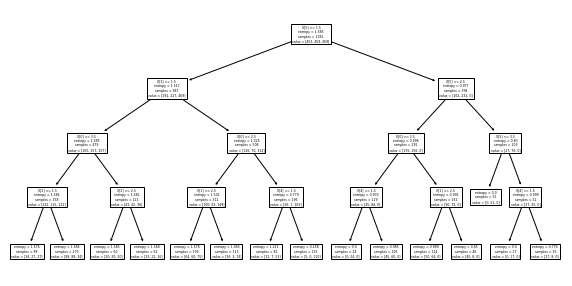

In [68]:
# Model Visualisazition

plt.figure(figsize=(10,5))
tree.plot_tree(model)
plt.show()

In [69]:
pred = model.predict(test_x)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(test_T, y_pred_train_gini)))

array([3, 3, 1, 1, 2, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 3, 2, 3, 1, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1,
       1, 3, 3, 3, 2, 3, 1, 2, 3, 3, 1, 2, 3, 2, 3, 3, 1, 1, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 2, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 2, 3, 3, 2, 1, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 1, 3, 3, 2, 3, 3, 2, 3, 1, 3,
       1, 3, 3, 3, 2, 3, 2, 3, 1, 2, 2, 2, 3, 1, 2, 3, 2, 3, 1, 2, 3, 2,
       2, 3, 3, 3, 3, 2, 1, 2, 3, 3, 2, 2, 3, 1, 3, 3, 2, 2, 2, 2, 3, 2,
       2, 2, 1, 2, 2, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 3, 3, 1, 2, 3, 3, 3,
       1, 2, 2, 1, 3, 2, 1, 3, 3, 2, 2, 2, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 1, 1, 2, 2, 3, 3, 3, 3, 3, 1, 3, 2, 1, 1, 3,
       3, 2, 3, 2, 3, 3, 1, 1, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 1, 3, 3,
       3, 3, 1, 2, 1, 3, 3, 2, 3, 3, 1, 1, 3, 2, 3, 1, 3, 3, 1, 3, 3, 1,
       3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 2, 1, 3, 3,